In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

news_data = pd.read_csv('./OnlineNewsPopularity.csv')
news_data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [2]:
news_data.shape

(39644, 61)

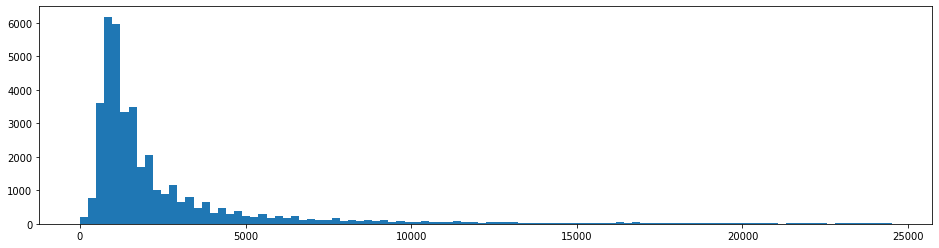

(39053, 1)

In [3]:
#Usuwanie wartości odstających

def reject_outliers(shares):
    u = np.median(news_data[' shares'])
    s = np.std(news_data[' shares'])
    filtered= [e for e in (news_data[' shares']) if (u - 2 * s < e < u + 2 * s)]
    return filtered

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] =16.0
fig_size[1] = 4.0

filtered = reject_outliers('shares')
plt.hist(filtered, 100)
fig_size[0]=16.0
fig_size[1]=8.0
plt.show()

news_data_shares = pd.DataFrame(filtered)
news_data_shares.shape

#Oryginalna liczba wierszy to 39644. Dzięki użyciu powyższej funkcji usunęliśmy 591 wartości odstających w podanym datasecie

In [4]:
#Tworzenie nowych danych bez wartości odstających.
#Definiujemy wartość odstającą jako wartość atrybutu „shares”, która jest poza dwoma standardowymi odchyleniami
#(= 3395 + (2 x 11627) = 26649)
fixedData = news_data[news_data[' shares']<26647]

In [5]:
#USTALENIE DANYCH WEJŚCIOWYCH I TARGETU
data = fixedData.iloc[1:,2:-1]
target = fixedData.iloc[1:,-1]
data.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364
5,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,0.0,4.359459,...,0.350610,0.136364,0.6,-0.195000,-0.400,-0.100000,0.642857,0.214286,0.142857,0.214286


In [6]:
target.head()

1     711
2    1500
3    1200
4     505
5     855
Name:  shares, dtype: int64

In [7]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler() 
data   = scaler.fit_transform(data)
data

array([[3.33333333e-01, 3.00920463e-02, 8.62686278e-04, ...,
        5.00000000e-01, 1.00000000e+00, 0.00000000e+00],
       [3.33333333e-01, 2.48996932e-02, 8.20441556e-04, ...,
        5.00000000e-01, 1.00000000e+00, 0.00000000e+00],
       [3.33333333e-01, 6.26622610e-02, 7.18670296e-04, ...,
        5.00000000e-01, 1.00000000e+00, 0.00000000e+00],
       ...,
       [3.80952381e-01, 5.21595468e-02, 7.36597916e-04, ...,
        5.68181818e-01, 9.09090909e-02, 1.36363636e-01],
       [1.90476190e-01, 8.04814727e-02, 7.69605268e-04, ...,
        5.00000000e-01, 1.00000000e+00, 0.00000000e+00],
       [3.80952381e-01, 1.85272599e-02, 1.00140763e-03, ...,
        6.25000000e-01, 3.33333333e-01, 2.50000000e-01]])

In [8]:
#DZIELENIE DANYCH NA MODELE UCZĄCE I TESTOWE

from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size = 0.10)
print("Training dataset:")
print("data_train:", data_train.shape)
print("target_train:", target_train.shape)
print("\nTesting dataset:")
print("data_test:", data_test.shape)
print("target_test:", target_test.shape)

Training dataset:
data_train: (35216, 58)
target_train: (35216,)

Testing dataset:
data_test: (3913, 58)
target_test: (3913,)


In [9]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

news_network = MLPRegressor(solver='adam', alpha=1e-5, 
                     hidden_layer_sizes=(50,50 ),verbose=True, random_state=1, max_iter=5000, tol=1e-7)
news_network.fit(data_train, target_train)

mse =  mean_squared_error(target_test, news_network.predict(data_test))
rmse = np.sqrt(mse)
print("Średni błąd kwadratu wyuczonego modelu: %.2f" %  mse)
print("Pierwiastek średniego błędu kwadratowego: %.2f" %  rmse)

Iteration 1, loss = 8700844.69100415
Iteration 2, loss = 6284583.00209406
Iteration 3, loss = 5547166.92660526
Iteration 4, loss = 5512061.84156870
Iteration 5, loss = 5481056.77886997
Iteration 6, loss = 5453208.07995036
Iteration 7, loss = 5429213.58261587
Iteration 8, loss = 5409854.09128581
Iteration 9, loss = 5392340.54564763
Iteration 10, loss = 5377361.97906728
Iteration 11, loss = 5367584.13837668
Iteration 12, loss = 5356856.44060058
Iteration 13, loss = 5349477.82324324
Iteration 14, loss = 5342725.87898349
Iteration 15, loss = 5336815.28362980
Iteration 16, loss = 5332834.10091082
Iteration 17, loss = 5328715.01807803
Iteration 18, loss = 5324690.44020576
Iteration 19, loss = 5323373.48026710
Iteration 20, loss = 5320183.13988598
Iteration 21, loss = 5316537.20939964
Iteration 22, loss = 5313457.79654834
Iteration 23, loss = 5312046.54771828
Iteration 24, loss = 5310219.74001198
Iteration 25, loss = 5307845.55029592
Iteration 26, loss = 5305329.52922782
Iteration 27, loss = 

Iteration 214, loss = 5149213.15818281
Iteration 215, loss = 5147578.23051970
Iteration 216, loss = 5146915.67245159
Iteration 217, loss = 5146521.76998058
Iteration 218, loss = 5149022.48446174
Iteration 219, loss = 5145114.24752643
Iteration 220, loss = 5143801.50585849
Iteration 221, loss = 5144880.84488993
Iteration 222, loss = 5143689.86154718
Iteration 223, loss = 5143398.79788869
Iteration 224, loss = 5141828.03352179
Iteration 225, loss = 5141787.97805036
Iteration 226, loss = 5141839.04411434
Iteration 227, loss = 5140129.34651112
Iteration 228, loss = 5139549.15066051
Iteration 229, loss = 5138821.98440317
Iteration 230, loss = 5138293.62491984
Iteration 231, loss = 5139387.19566662
Iteration 232, loss = 5137791.50621773
Iteration 233, loss = 5135904.05390137
Iteration 234, loss = 5136714.34041140
Iteration 235, loss = 5135930.66042914
Iteration 236, loss = 5135523.27655606
Iteration 237, loss = 5135493.83771072
Iteration 238, loss = 5135450.41539470
Iteration 239, loss = 513

Iteration 425, loss = 5074724.25715026
Iteration 426, loss = 5076555.23545348
Iteration 427, loss = 5081075.28661220
Iteration 428, loss = 5075804.12947836
Iteration 429, loss = 5075015.55178476
Iteration 430, loss = 5073994.20881925
Iteration 431, loss = 5072654.90978154
Iteration 432, loss = 5074059.47471665
Iteration 433, loss = 5075337.52649667
Iteration 434, loss = 5073440.57559414
Iteration 435, loss = 5074716.03230331
Iteration 436, loss = 5073597.05110245
Iteration 437, loss = 5072170.67563868
Iteration 438, loss = 5073300.43076197
Iteration 439, loss = 5070581.90902800
Iteration 440, loss = 5075946.60777090
Iteration 441, loss = 5072570.00810655
Iteration 442, loss = 5073069.84966232
Iteration 443, loss = 5073950.39843712
Iteration 444, loss = 5071162.29421285
Iteration 445, loss = 5072990.34852343
Iteration 446, loss = 5071606.72487051
Iteration 447, loss = 5070384.72181237
Iteration 448, loss = 5070342.30403643
Iteration 449, loss = 5071936.54630200
Iteration 450, loss = 507

Iteration 636, loss = 5037314.15726192
Iteration 637, loss = 5033094.61024284
Iteration 638, loss = 5032073.80102754
Iteration 639, loss = 5034077.72097348
Iteration 640, loss = 5034496.05690381
Iteration 641, loss = 5031687.55458815
Iteration 642, loss = 5030669.63371531
Iteration 643, loss = 5030697.99100361
Iteration 644, loss = 5034263.55103767
Iteration 645, loss = 5032609.23680019
Iteration 646, loss = 5031134.69884471
Iteration 647, loss = 5032316.56661427
Iteration 648, loss = 5033824.37376621
Iteration 649, loss = 5029426.68796589
Iteration 650, loss = 5029526.32922263
Iteration 651, loss = 5031073.79479634
Iteration 652, loss = 5030334.19389178
Iteration 653, loss = 5030632.59289379
Iteration 654, loss = 5030014.62334800
Iteration 655, loss = 5031031.04201242
Iteration 656, loss = 5028649.37565364
Iteration 657, loss = 5030820.06029209
Iteration 658, loss = 5030285.67779595
Iteration 659, loss = 5027852.85263905
Iteration 660, loss = 5027709.40763435
Iteration 661, loss = 502

In [10]:
from sklearn.metrics import r2_score
print('Variance score: %.2f' % r2_score(target_test, news_network.predict(data_test)))
# 50,50 solver=adam, MinMaxScaled, max_iter 5000 -> 0.09 (0.08-0.09)
# Sieć neuronowa dla naszych danych jest bardziej stabilna. Poprzednie modele(regresja liniowa, reg liniowa z SVD)
# dawały różne wyniki od 5% do 7%. Natomiast sieć neuronowa w wybranych warstwach bardzo często daje ten sam wynik -> 9%
# Dalej jest to niski wynik wytrenowania, lecz jest on bardziej stabilny.

Variance score: 0.09


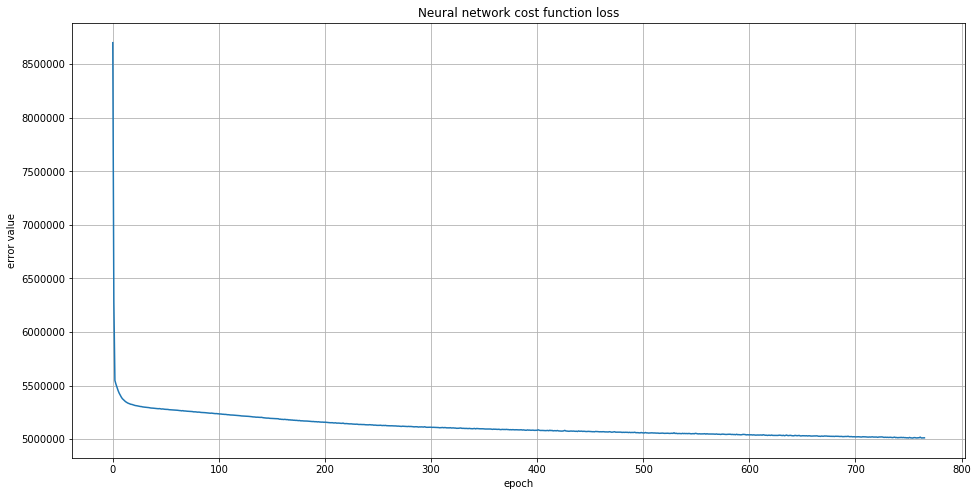

In [11]:
import matplotlib.pyplot as plt
plt.plot(news_network.loss_curve_)
plt.title('Neural network cost function loss')

plt.xlabel('epoch'); plt.ylabel('error value'); plt.grid();


Wykres predykcji


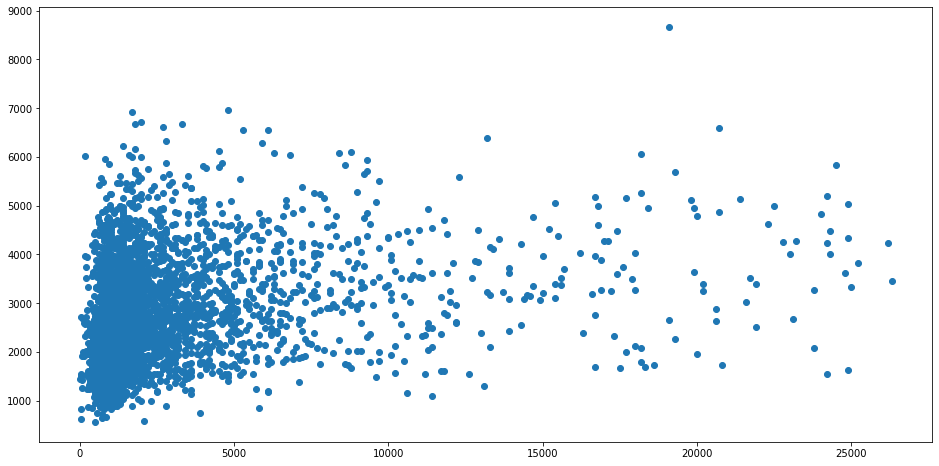

In [12]:
#WYKRES PREDYKCJI
plt.scatter(target_test, news_network.predict(data_test))
print("Wykres predykcji")


In [13]:
df_someXdata = pd.DataFrame(news_network.predict(data_train),list(target_train) )
df_someXdata.reset_index(level=0, inplace=True)
df_someXdata_LR = df_someXdata.rename(index=str, columns={"index": "Actual shares", 0: "Predicted shares"})
df_someXdata_LR.head(11)

,Actual shares,Predicted shares
0,1200,1757.986290
1,1500,3604.507102
2,1200,1596.340508
3,12400,9502.364824
4,996,3132.183373
5,2800,2384.867843
6,1600,2545.020648
7,16100,2272.655687
8,725,2345.323236
9,1500,1601.520949
